In [1]:
# Import
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import mode
from scipy.interpolate import lagrange
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import svd

In [2]:
df = pd.read_csv("Fire.csv",skiprows=[0,123,124], sep=',')
df = df.drop("day",axis=1) 
df = df.drop("year",axis=1)
df = df.drop("month",axis=1)
last_column_name = df.columns[-1] 
df = df.dropna() #drop NAN in the "classes" since the result is unknow we can't measure whether is fire or not fire which is meanless to the data
df.rename(columns={last_column_name: 'Classes'}, inplace=True)  #the columns' name with some space I rename it to better index
df['Classes'] = df['Classes'].apply(lambda x: 1 if x.strip().lower() == 'fire' else 0) #make not fire as 0 fire as 1
df.loc[df['DC'] == '14.6 9', 'DC'] = '14.69' # A mistake in DC that 14.69 become 14.6 9 

In [3]:
for column in df.columns:#transfer all value into numeric to plot
    df[column] = pd.to_numeric(df[column], errors='coerce')
df = df.dropna()
X = df.iloc[:, 1:-1]  # X
y = df.iloc[:, -1] # y

In [4]:
#check whether the NAN exist
# null_indexes = df.isnull().stack()[lambda x: x].index.tolist()
# for index in null_indexes:
#     print(index)

In [5]:
#fulfill Nan with mean
# df = df.fillna(df.mean())
# df.loc[122]

In [6]:
#Lagrangian median filling the estimated value is incorrect may cause by Sparse data points or large distances between data points produce suboptimal estimates
# def lagrange_fillna(series):
#     valid_indices = series.dropna().index
#     valid_values = series.dropna().values
#     poly = lagrange([120,121,123,124,125], [120,121,123,124,125])
#     series.at[122] = poly[122] 
#     return series
# for column in df.columns:
#     df[column] = lagrange_fillna(df[column])
# df

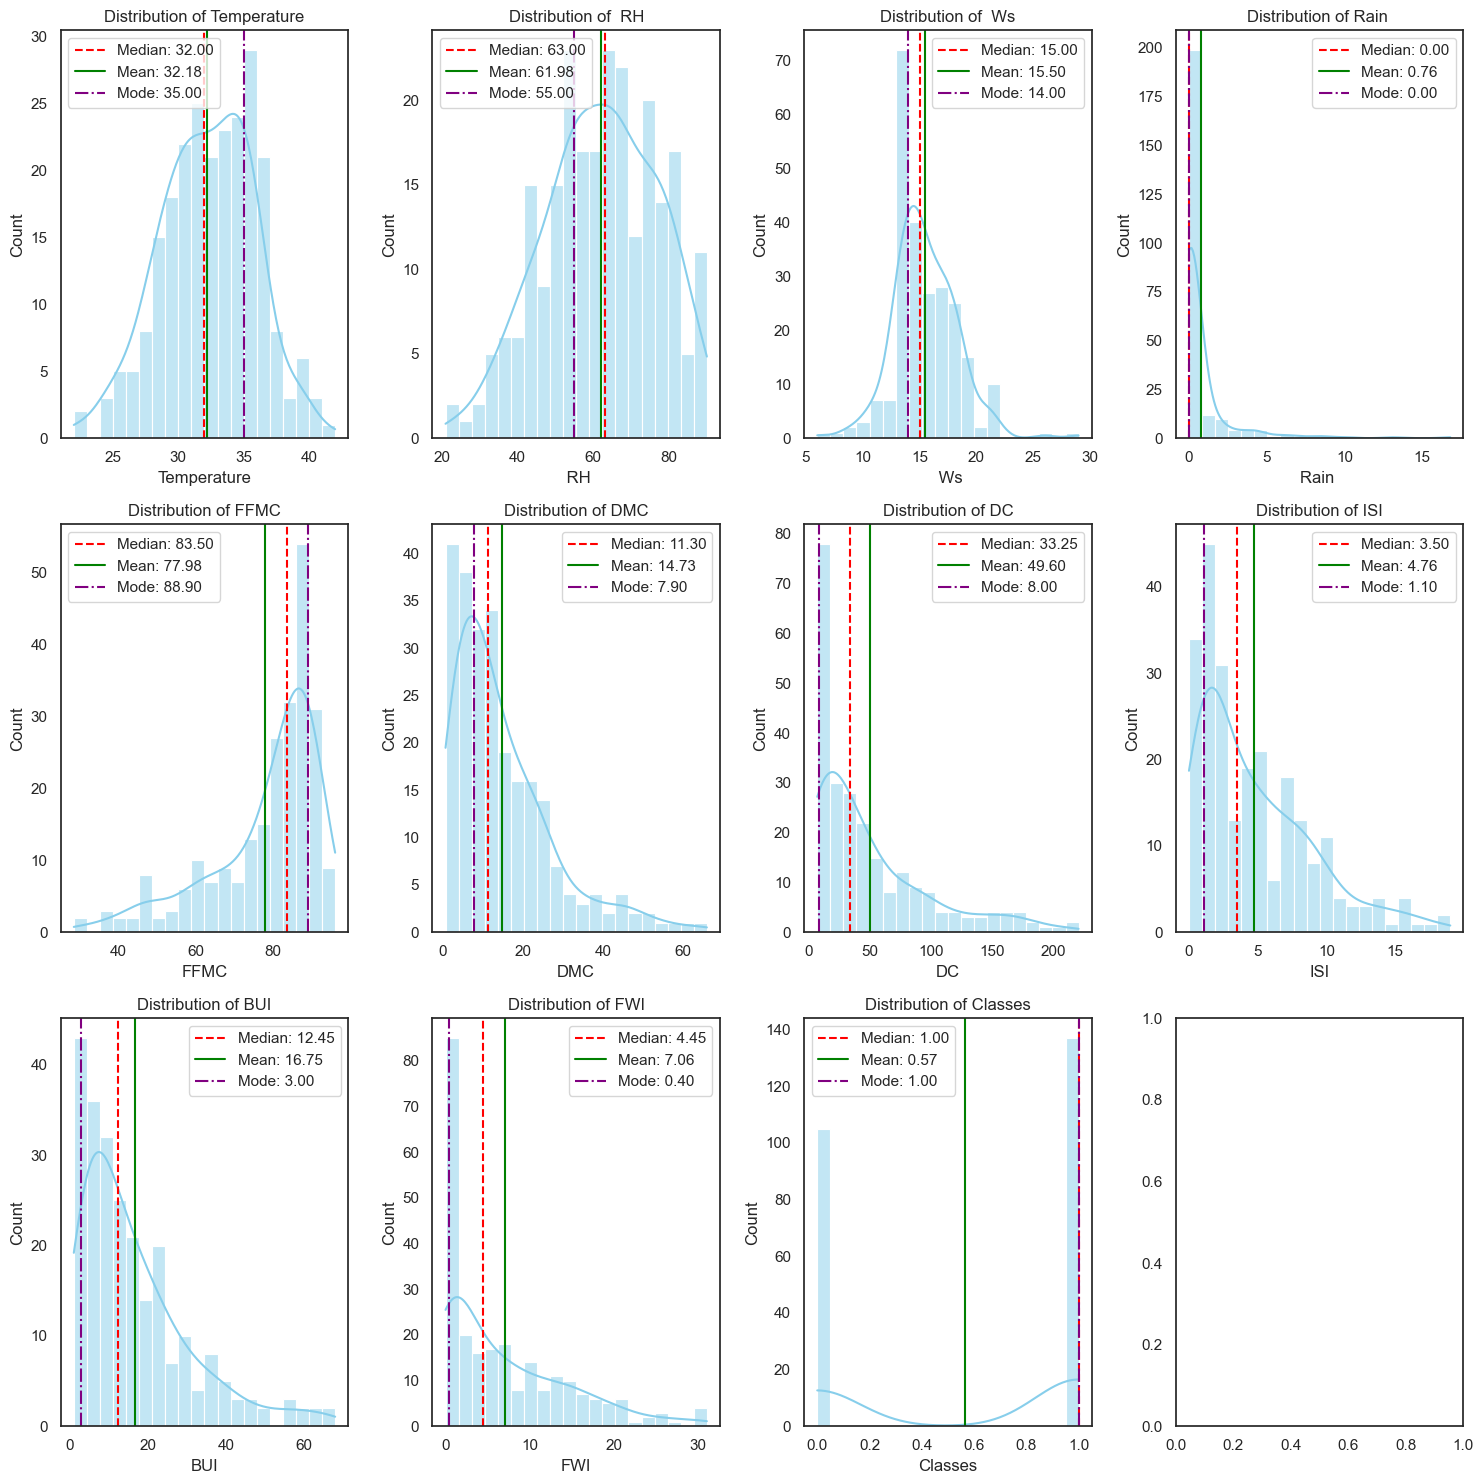

In [7]:
sns.set(style="white")
fig, axes = plt.subplots(3,4, figsize=(15, 15))

# flat value
axes = axes.flatten()
# plot histogram for every attributes
for i, col in enumerate(df.columns):
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue", bins=20)
    # median
    median = df[col].median()
    axes[i].axvline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')
    # mean
    mean = df[col].mean()
    axes[i].axvline(mean, color='green', linestyle='-', label=f'Mean: {mean:.2f}')
    # mode
    mode = df[col].mode().values[0]
    axes[i].axvline(mode, color='purple', linestyle='-.', label=f'Mode: {mode:.2f}')
    # title of sub plots
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()
    
plt.tight_layout()
plt.show()


In [8]:
df['Classes']

0      0
1      0
2      0
3      0
4      0
      ..
240    1
241    0
242    0
243    0
244    0
Name: Classes, Length: 242, dtype: int64

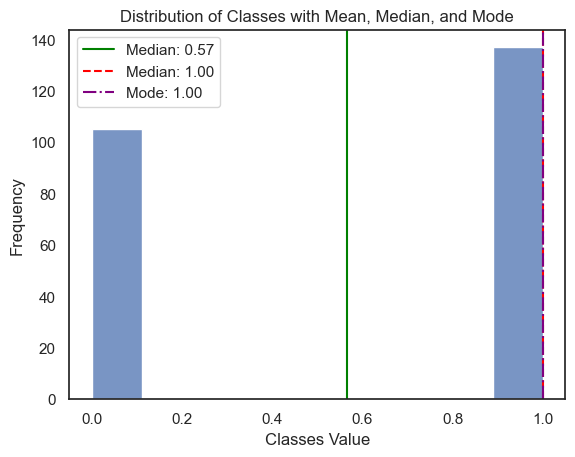

In [9]:

from scipy import stats

# 假设df是你的DataFrame，Y是df的最后一列
Y = df.iloc[:, -1]

# 计算Y的平均值、中位数和众数
mean_Y = Y.mean()
median_Y = Y.median()
mode_Y = Y.mode()[0]  # mode()返回一个Series，我们取第一个值作为众数

# 使用Seaborn绘制Y的柱状图
sns.histplot(Y, kde=False)

# 在图上标记平均值、中位数和众数
plt.axvline(mean_Y, color='green', linestyle='-', label=f'Median: {mean_Y:.2f}')
plt.axvline(median_Y, color='red', linestyle='--', label=f'Median: {median_Y:.2f}')
plt.axvline(mode_Y, color='purple', linestyle='-.', label=f'Mode: {mode_Y:.2f}')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Distribution of Classes with Mean, Median, and Mode')
plt.xlabel('Classes Value')
plt.ylabel('Frequency')

# 显示图形
plt.show()


In [10]:
# sns.boxplot(data=df)
# plt.title('Boxplot of Feature by Class')
# plt.show()

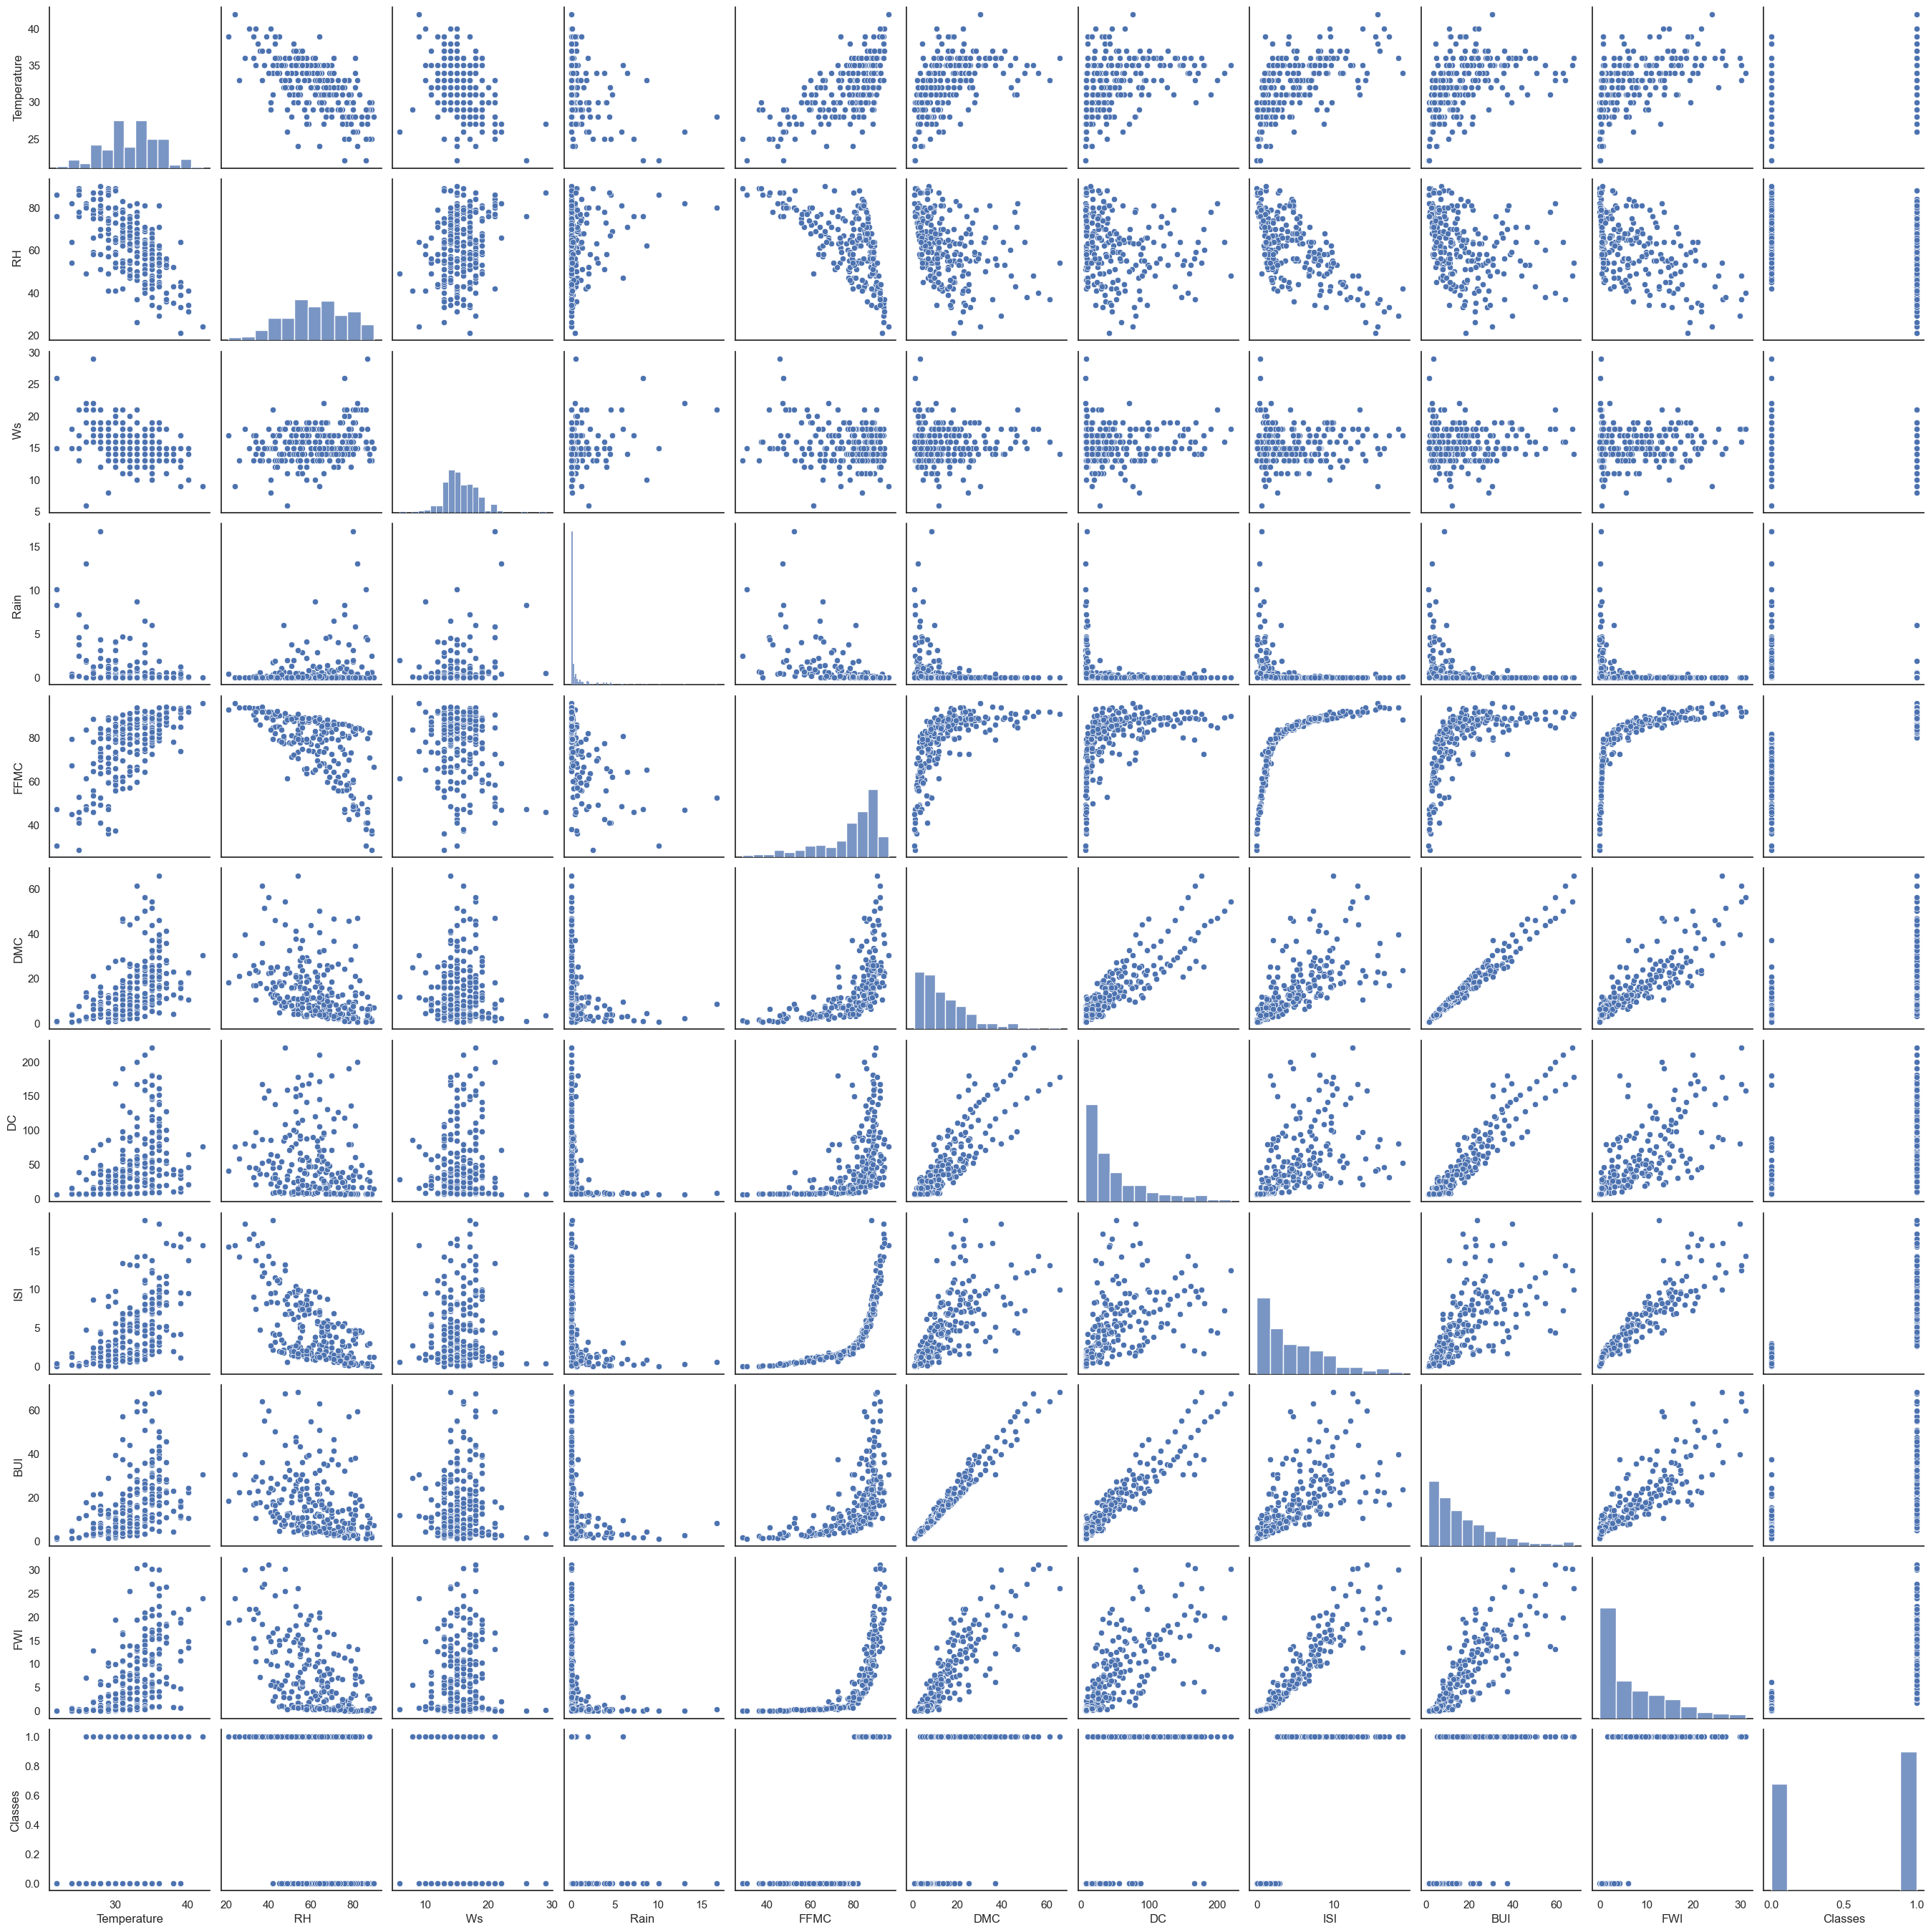

In [11]:
sns.pairplot(df)
plt.show()

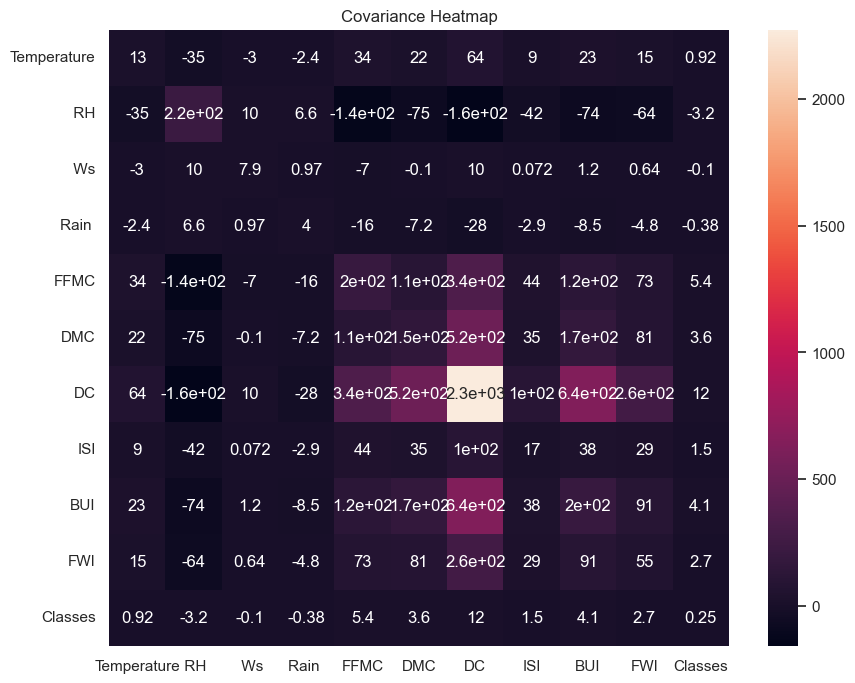

In [12]:
#Covariance
cov = df.cov()
plt.figure(figsize=(10, 8))
sns.heatmap(cov, annot=True)
plt.title('Covariance Heatmap')
plt.show()

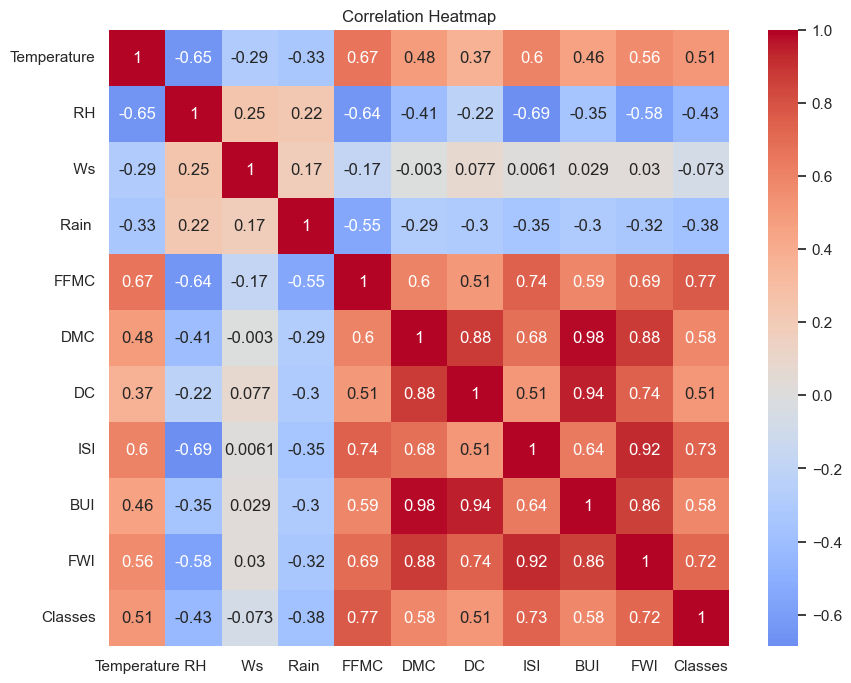

In [13]:
#correlation
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

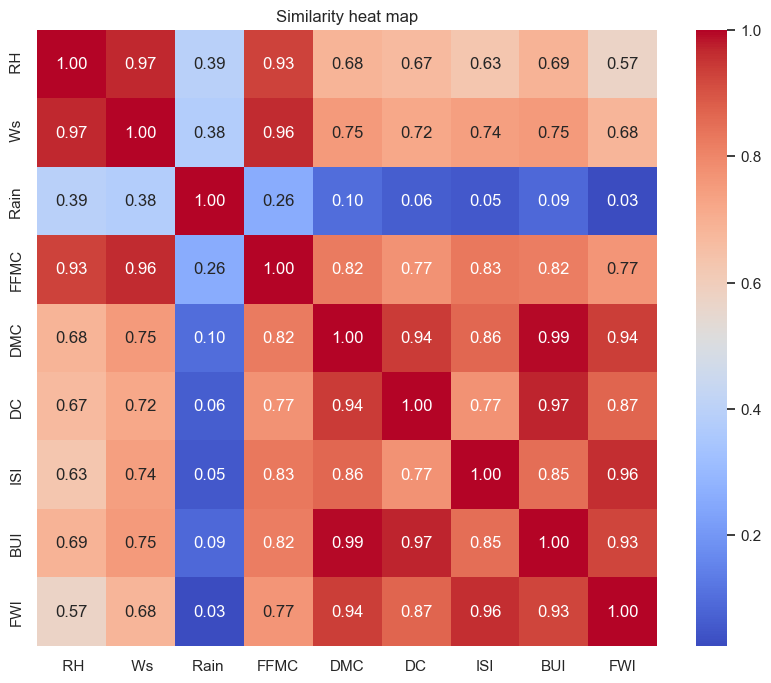

In [14]:
#similarity by cosine_similarity
similarity_matrix = cosine_similarity(X.T)
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt=".2f",xticklabels=X.columns, yticklabels=X.columns)

plt.title("Similarity heat map")
plt.show()

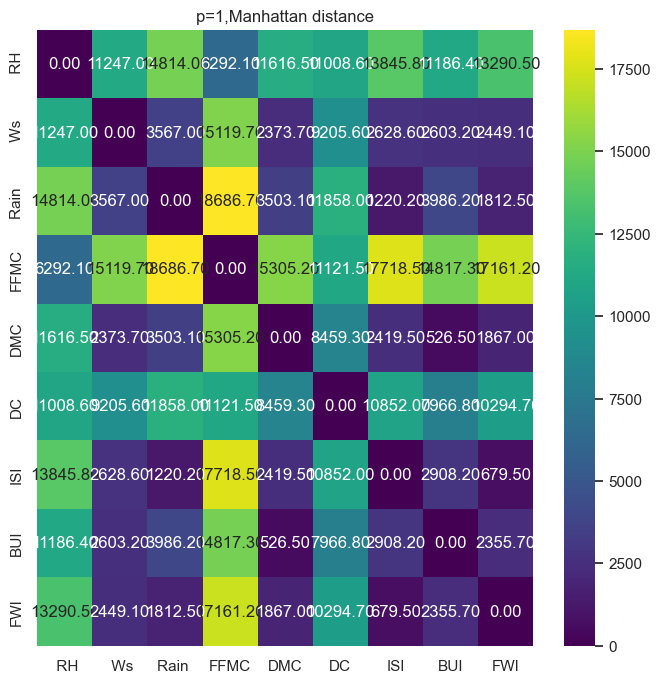

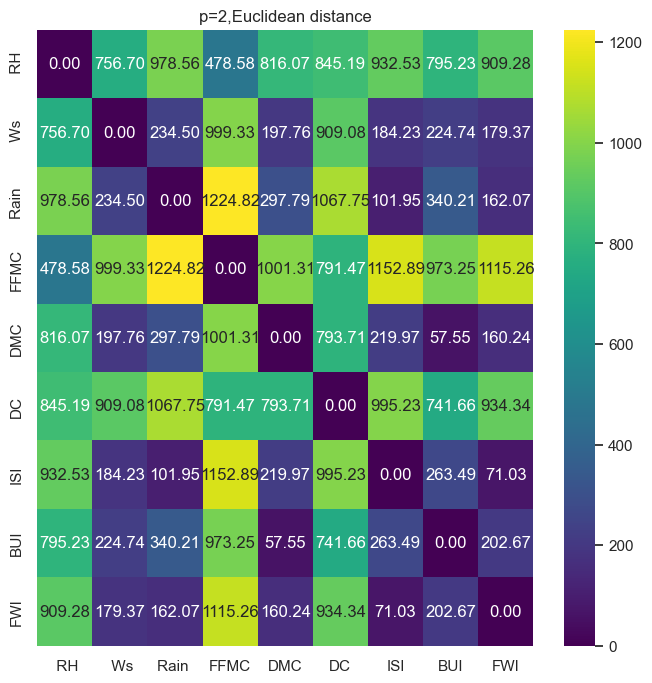

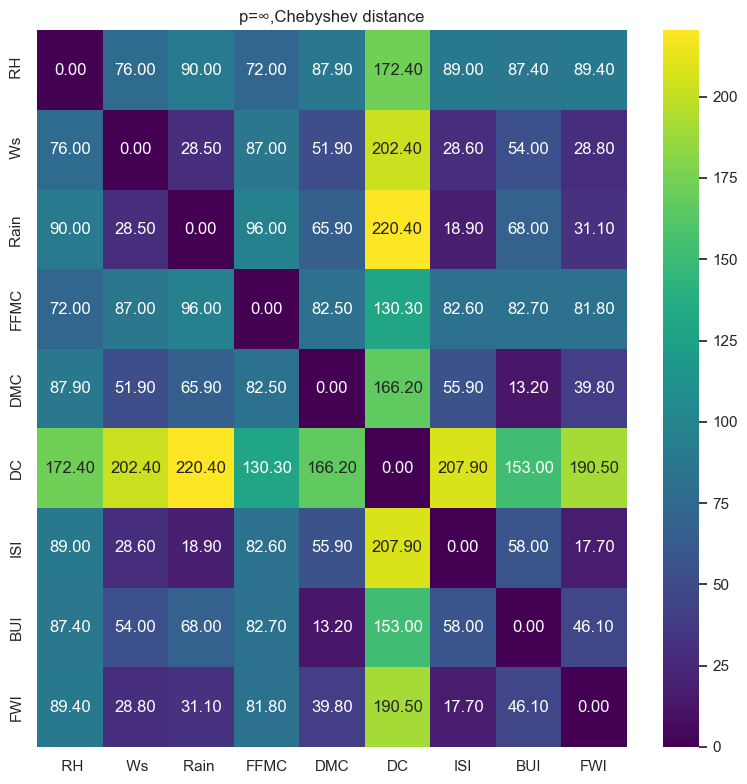

In [15]:
#disimilarity measures by p Distance.p=1 (Manhattan distance) p=2 (Euclidean distance)  p=∞ (Chebyshev distance)
p_values = [1, 2, np.inf]
titles = ['p=1,Manhattan distance', 'p=2,Euclidean distance', 'p=∞,Chebyshev distance']
for i, p in enumerate(p_values):
    dissimilarity_matrix = squareform(pdist(X.T, 'minkowski', p=p))
    plt.figure(figsize=(8, 8))
    sns.heatmap(dissimilarity_matrix, annot=True, cmap='viridis', fmt=".2f",xticklabels=X.columns, yticklabels=X.columns)
    plt.title(titles[i])

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

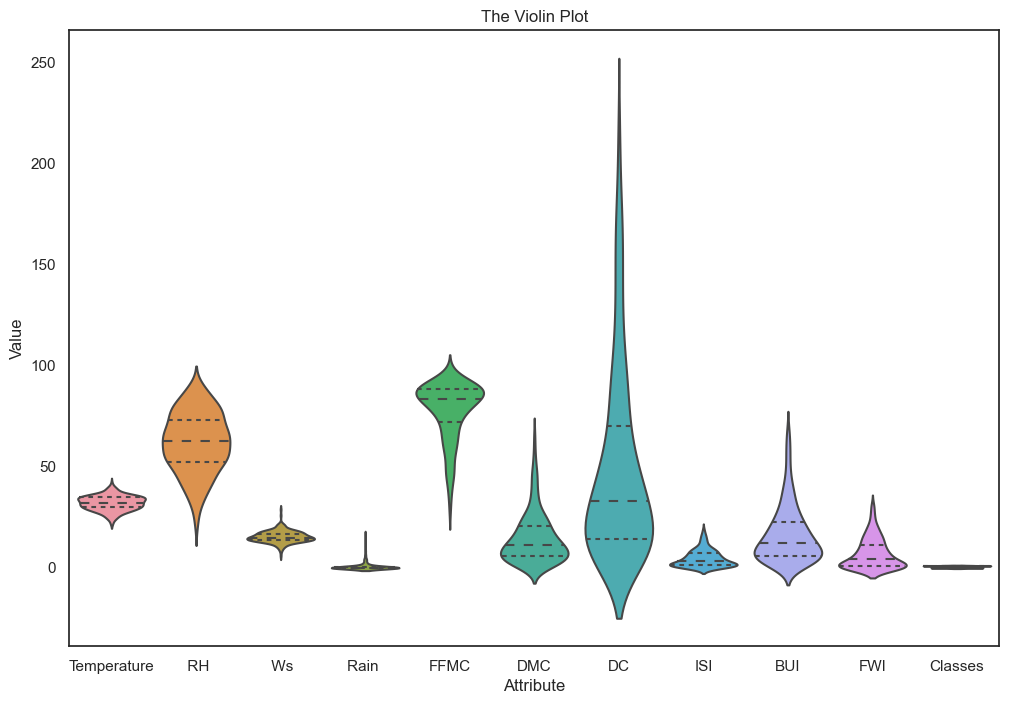

In [16]:
plt.figure(figsize=(14, 10))
columns = df.columns[0:-1]
df_melted = df.melt(var_name='Attribute', value_name='Value')
plt.figure(figsize=(12, 8))
# violinplot
sns.violinplot(x='Attribute', y='Value', data=df_melted, inner='quartile', scale='width')
plt.title('The Violin Plot')
plt.show()

In [23]:
# X_normal = X - X.mean()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #normalization
# apply pca to get three principal component
pca = PCA(n_components=3)
#SVD
# U, S, Vt = svd(X_scaled, full_matrices=False)
# X_pca = X_scaled @ Vt.T
X_pca = pca.fit_transform(X_scaled)
# transfer pca to dataframe
pca_df = pd.DataFrame(data=X_pca[:,0:3], columns=['PC1', 'PC2', 'PC3'])
pca_df

,PC1,PC2,PC3
0,-1.897053,-0.215404,0.343479
1,-2.084673,-0.878809,-0.157420
2,-4.349443,3.797940,3.820138
3,-3.885552,0.829187,-0.754002
4,-2.227396,0.036724,-0.632750
...,...,...,...
237,0.172138,-0.506574,-0.547319
238,-3.436241,1.408767,0.048538
239,-3.188669,3.504384,0.993754
240,-1.321282,-0.490613,0.436053


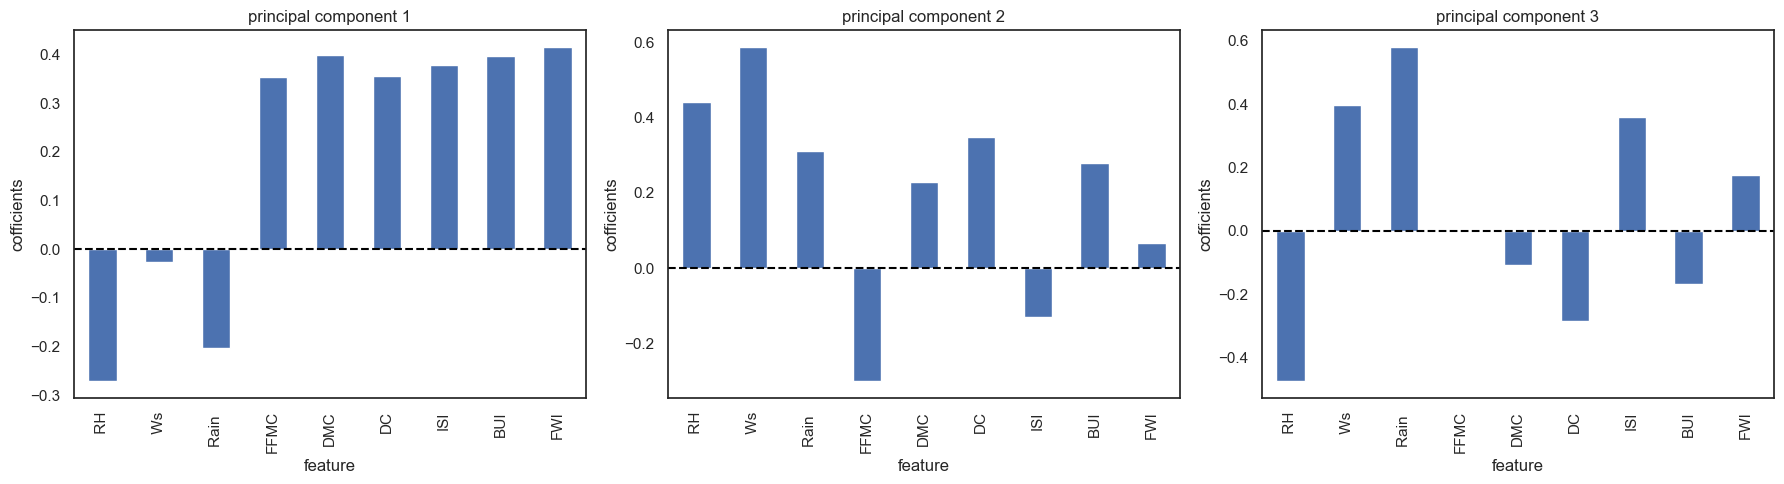

In [24]:
pca_coefficients_df = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2', 'PC3'])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  
for i, pc in enumerate(pca_coefficients_df.index):
    pca_coefficients_df.loc[pc].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'principal component {i+1}')
    axes[i].set_ylabel('cofficients')
    axes[i].set_xlabel('feature')
    axes[i].axhline(y=0, color='black', linestyle='--')  # 在y=0处画一条线

plt.tight_layout()  # 调整子图布局
plt.show()

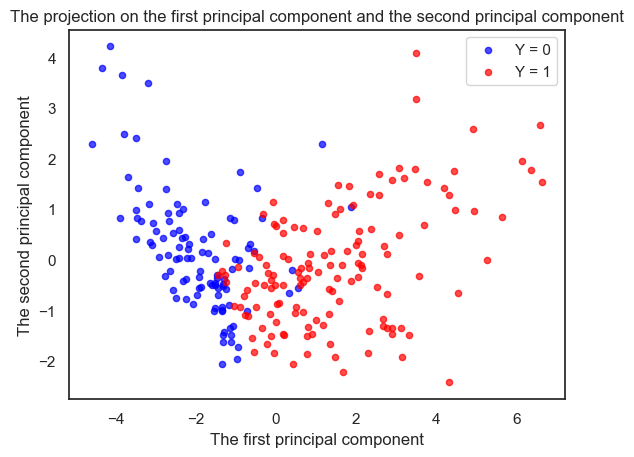

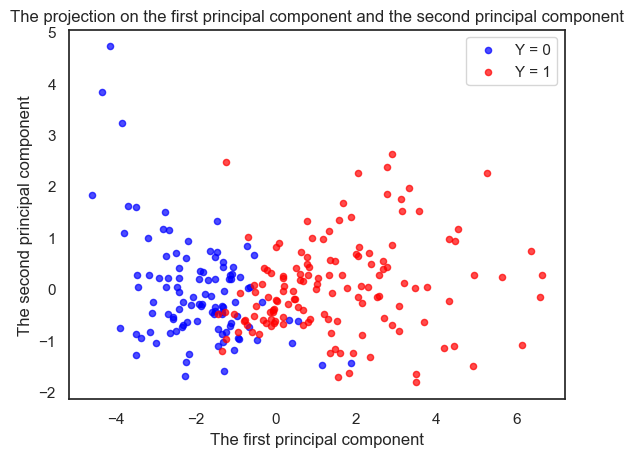

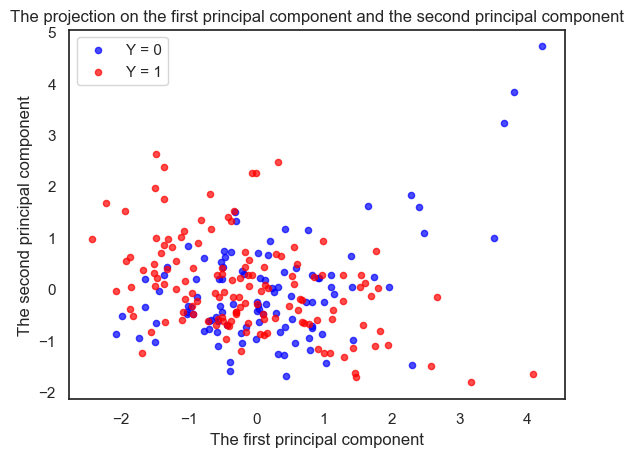

In [25]:

for target, color in zip([0, 1], ['blue', 'red']):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], c=color, label=f'Y = {target}', s=20, alpha=0.7)
plt.xlabel('The first principal component')
plt.ylabel('The second principal component')
plt.legend()
plt.title('The projection on the first principal component and the second principal component')
plt.show()

for target, color in zip([0, 1], ['blue', 'red']):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 2], c=color, label=f'Y = {target}',s=20, alpha=0.7)
plt.xlabel('The first principal component')
plt.ylabel('The second principal component')
plt.legend()
plt.title('The projection on the first principal component and the second principal component')
plt.show()


for target, color in zip([0, 1], ['blue', 'red']):
    plt.scatter(X_pca[y == target, 1], X_pca[y == target, 2], c=color, label=f'Y = {target}', s=20, alpha=0.7)
plt.xlabel('The first principal component')
plt.ylabel('The second principal component')
plt.legend()
plt.title('The projection on the first principal component and the second principal component')
plt.show()


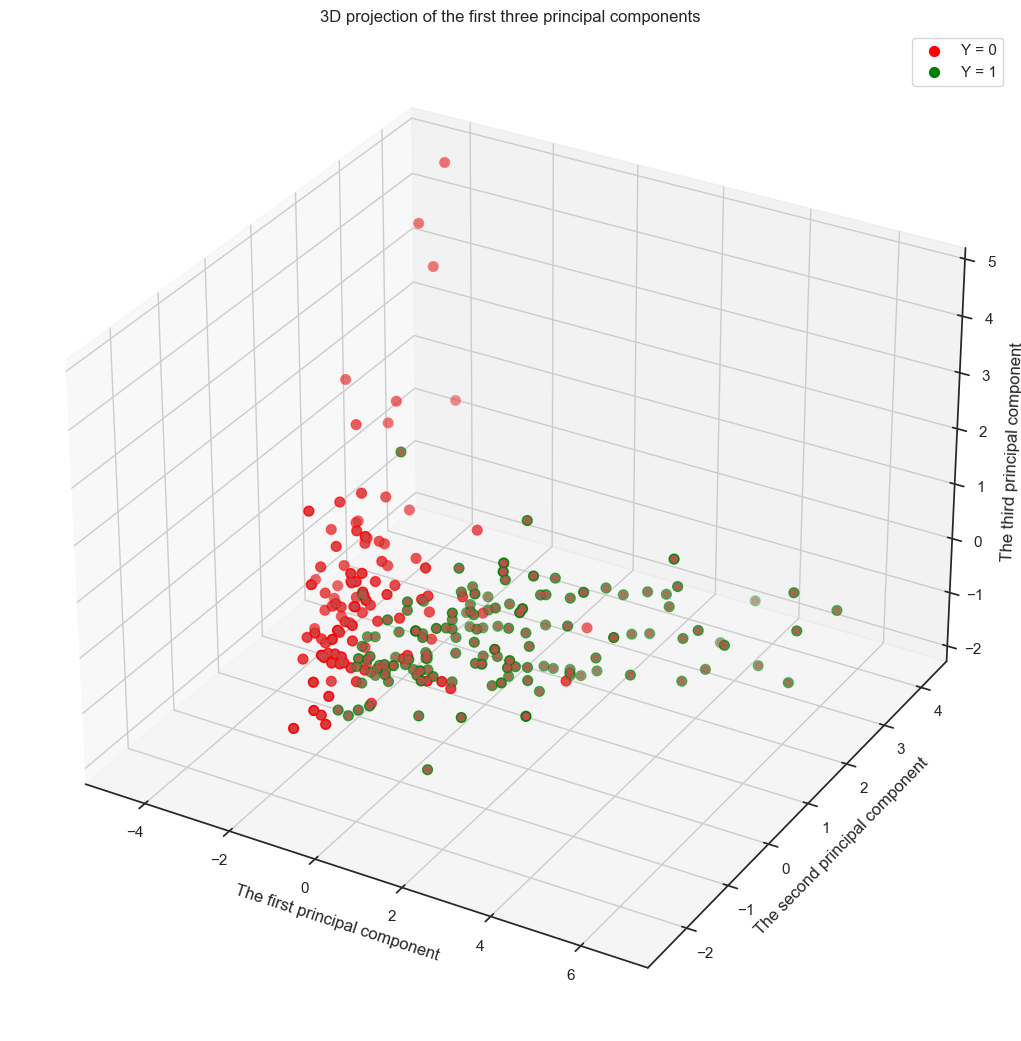

In [26]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')

# 根据Y的值为点上色
colors = ['red', 'green']
for target in [0, 1]:
    indicesToKeep = y == target
    ax.scatter(X_pca[indicesToKeep, 0], X_pca[indicesToKeep, 1], X_pca[indicesToKeep, 2], c=colors[target], s=50, label=f'Y = {target}')

ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='r', marker='o')

ax.set_xlabel('The first principal component')
ax.set_ylabel('The second principal component')
ax.set_zlabel('The third principal component')
plt.legend()
plt.title('3D projection of the first three principal components')

plt.show()
